In [ ]:
!pip install -q diffusers transformers accelerate safetensors

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


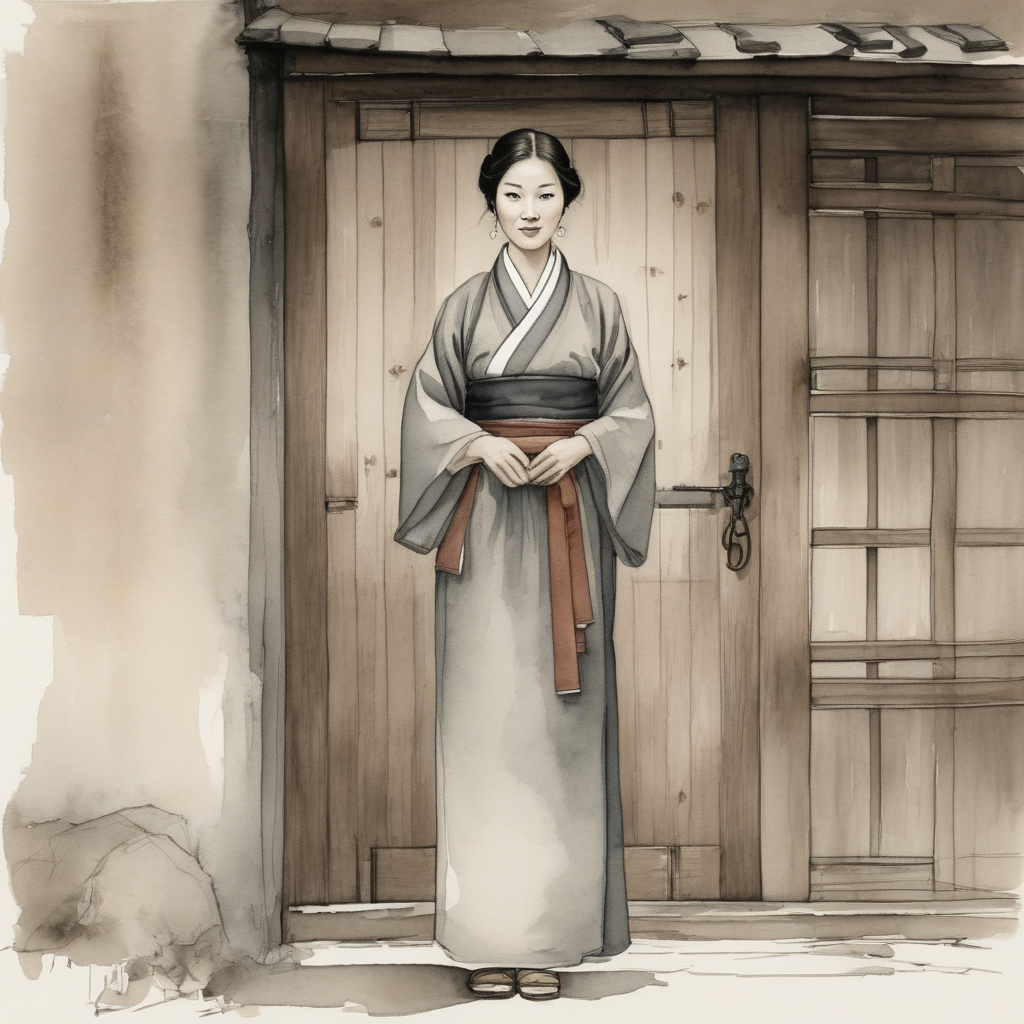

✅ 연구용 이미지가 저장되었습니다: /content/drive/MyDrive/generated/260218_sdxl_melt3_scaleup7.5_3.png


In [ ]:
#@title 🧪 SDXL T2I Generation

!pip install -q diffusers transformers accelerate safetensors

import torch
from diffusers import DiffusionPipeline
from google.colab import drive
import os

drive.mount('/content/drive')

#@markdown ### SDXL Base Model Load (No LoRA)
# SDXL 1.0 Official Base Model
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"#@param {type:"string"}

pipe = DiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe = pipe.to("cuda")

#@markdown ---
#@markdown ### Study prompts and settings (same as the LoRA learning environment)
#@markdown **Prompt:** Please enter the trigger word or caption style you used during learning.
prompt = "Main-girl in a traditional hanbok stands resolute, holding a gleaming. Center. A sturdy wooden door bars the entrance with a thick wooden latch. Right. Kimhongdo style, ink wash painting, muted earthy tones, subtle color highlights, thin line." #@param {type:"string"}
negative_prompt = "text, bright colors, saturated tones, golden embroidery, digital art, anime, cartoon, 3D render, fantasy, glossy finish, distorted face, blurry face, extra limbs" #@param {type:"string"}

#@markdown **Prompt Fidelity Parameter:**
num_inference_steps = 30
guidance_scale = 7.5 #@param {type:"slider", min:1, max:20, step:0.5}

#@markdown ---
#@markdown ### Create images and save comparison results
# Immobilizing seeds can increase the reproducibility of your experiments.
seed = 42 #@param {type:"integer"}
generator = torch.Generator("cuda").manual_seed(seed)

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator,
    target_size=(1024, 1024),
    original_size=(1024, 1024)
).images[0]

display(image)

# Save path (indicate scale in file name for experimental data management)
save_path = f"/content/drive/MyDrive/generated/260218_sdxl_melt3_scaleup7.5_3.png"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
image.save(save_path)

print(f"✅ Research images have been saved: {save_path}")